In [10]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import numpy as np

In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [ ]:
df.sample()

This gets the first and last year of the franchise, creates columns and then gives the relative position of each release in the franchise as a percentage

In [13]:
df = df.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


This gets the highest and lowest vote of the franchise and creates columns

In [14]:
df = df.groupby('franchise_id').agg(min_vote=('votes_average', 'min'), max_vote=('votes_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


This gets the highest and lowest rating of the franchise and creates columns

In [15]:
df = df.groupby('franchise_id').agg(min_rating=('rating_average', 'min'), max_rating=('rating_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


In [118]:
df.head()

,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise,franchise_count_bin
0,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,tt0315808,Baseball,1978,0,NaN,"[' Family', ' Sports', 'Sport', ' Baseball']",13.0,3.00,195.0,1.0,NaN,NaN,NaN,NaN,-3.808490,-0.253646,0.000000,20+
1,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,tt0176664,Donkey Kong,1981,0,NaN,"[' Platformer', 'Action']",2011.0,7.40,195.0,1.0,3.0,1998.0,4.40,0.0,0.278200,0.593586,6.818182,20+
2,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,0,NaN,"[' Platformer', 'Action', ' Family']",170.5,6.50,195.0,2.0,1.0,-1840.5,-0.90,1.0,-0.557714,-0.186860,9.090909,20+
3,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,0,NaN,"[' Pinball', ' Fantasy', ' Sports', ' Baseball...",326.8,6.00,195.0,5.0,1.0,156.3,-0.50,3.0,-1.022110,-0.120583,11.363636,20+
4,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0185017, tt0186168, tt3404206, tt3410580","Wrecking Crew, Golf, Mario Bros. Special, Punc...",1984,0,NaN,"['Golf', ' Sports', ' Sport', 'Puzzle', ' Acti...",49.5,5.85,195.0,4.0,1.0,-277.3,-0.15,-1.0,-1.161429,-0.238169,13.636364,20+


In [17]:
df[df["max_vote"] == df["votes_average"]][df["franchise_name"]  == "Mario"]

C:\Users\35387\AppData\Local\Temp\ipykernel_148244\1560562855.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["max_vote"] == df["votes_average"]][df["franchise_name"]  == "Mario"]


,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
5,3025-1,3.0,8.9,13.0,6522.0,1978,2022,Mario,game,tt0177266,Super Mario Bros.,1985,0,NaN,"[' Pinball', 'Animation', ' Action', ' Adventu...",6522.0,8.9,195.0,1.0,1.0,6472.5,3.05,-3.0,1.67139,2.50643,15.909091


C:\Users\35387\AppData\Local\Temp\ipykernel_148244\3455971344.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["min_vote"] == df["votes_average"]][df["franchise_count"] >20].position_in_franchise.value_counts().sort_index().plot()


<AxesSubplot:>

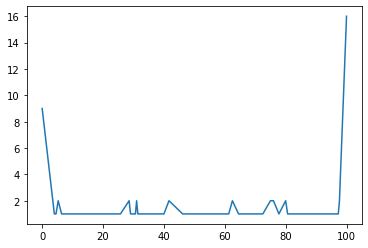

In [18]:
df[df["min_vote"] == df["votes_average"]][df["franchise_count"] >20].position_in_franchise.value_counts().sort_index().plot()

In [19]:
df.sample()

,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
2802,3025-2657,5.7,8.1,7.0,194.0,1996,2020,Goosebumps,game,tt0219709,Goosebumps: Attack of the Mutant,1997,0,NaN,"['Adventure', ' Action', ' Action-Adventure', ...",56.0,7.8,5.0,1.0,1.0,-138.0,-0.3,0.0,0.649717,-0.235413,4.166667


<AxesSubplot:xlabel='position_in_franchise', ylabel='rating_average'>

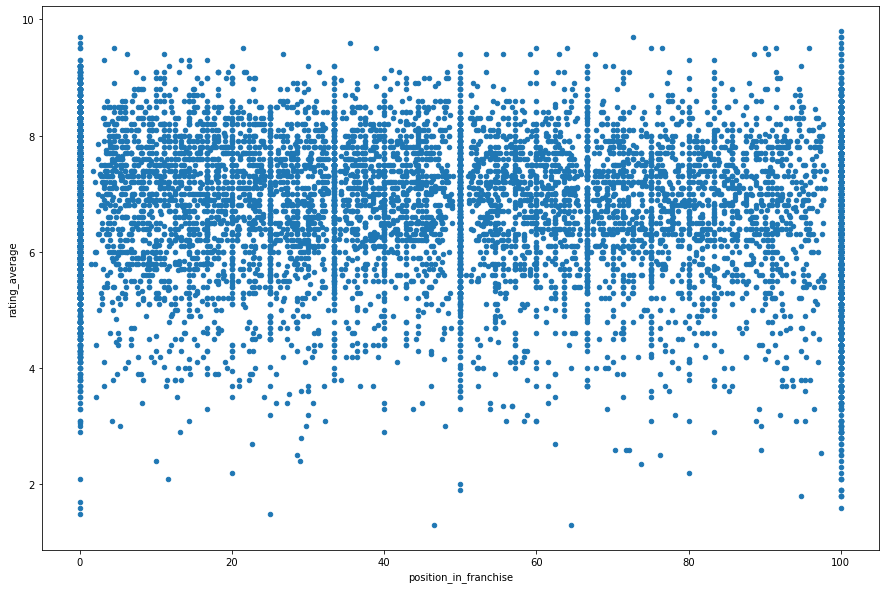

In [20]:
df.plot.scatter("position_in_franchise", "rating_average", figsize = (15,10))

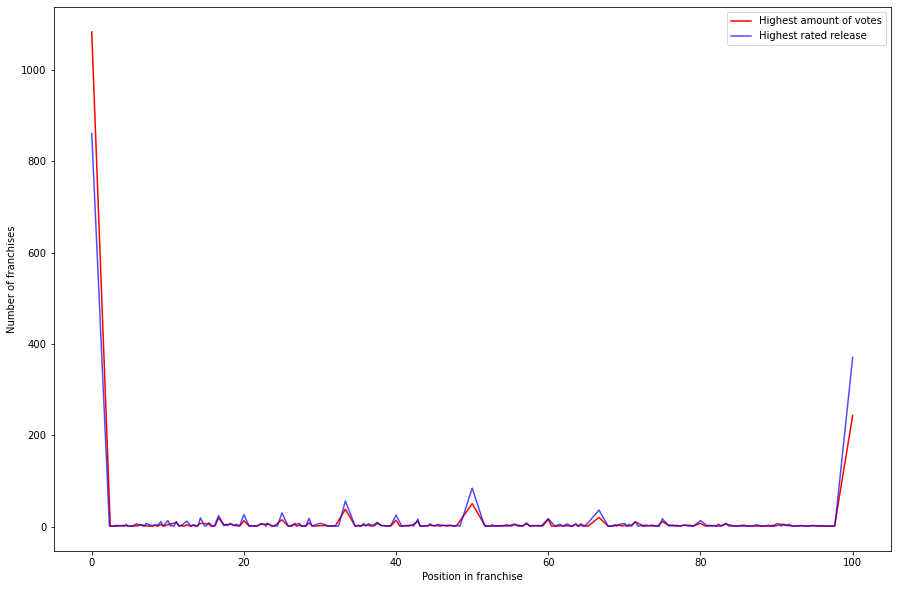

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

df[df["max_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Highest amount of votes")
df[df["max_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Highest rated release")
plt.legend()
plt.show()

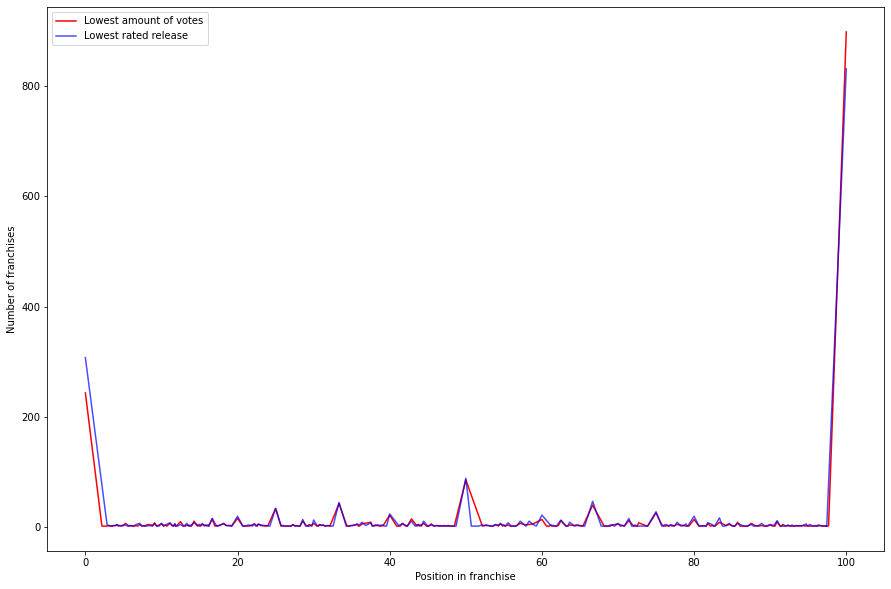

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Lowest amount of votes")
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Position in franchise of lowest rated release', ylabel='Number of franchises'>

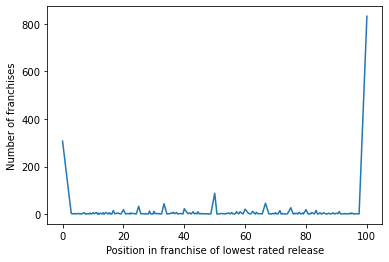

In [23]:
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel = "Position in franchise of lowest rated release", ylabel = "Number of franchises")

<AxesSubplot:xlabel='Position in franchise of release with least votes', ylabel='Number of franchises'>

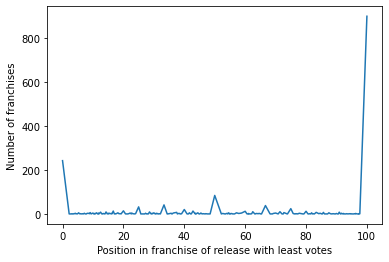

In [24]:
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel = "Position in franchise of release with least votes", ylabel = "Number of franchises")

In [25]:
df.sample()

,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
8438,f1338,5.9,7.0,65.0,379.5,1969,1989,Otoko wa Tsurai yo,movie,tt0070496,tora-san goes french,1973,0,107,['Comedy'],109.0,6.6,6.0,1.0,3.0,-30.0,-0.1,0.0,0.507866,-0.34392,20.0


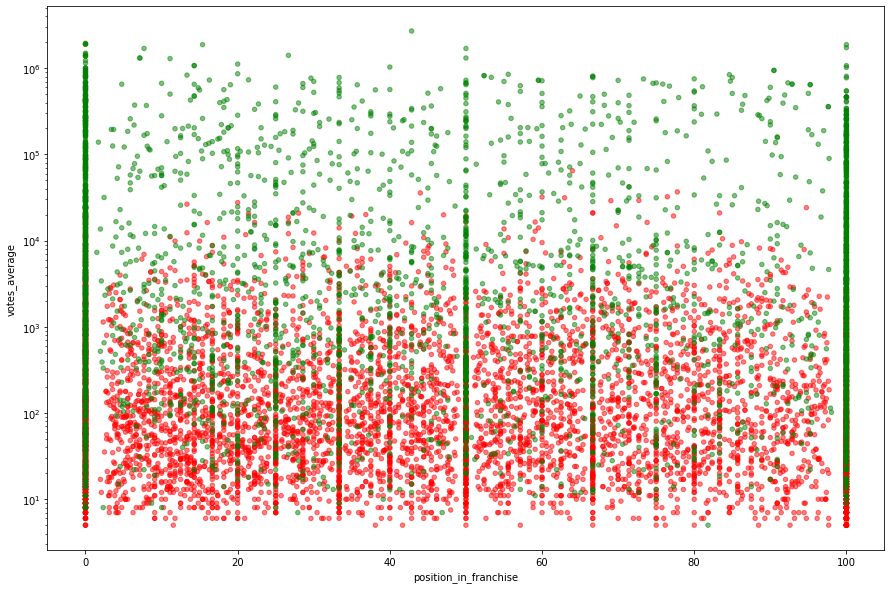

In [26]:
df.plot.scatter("position_in_franchise", "votes_average", c=df['type'].map({'movie': 'green', 'game': 'red'}), alpha = 0.5, figsize = (15,10))
plt.yscale('log', base=10)

In [27]:
df


,franchise_id,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
0,3025-1,3.00,8.9,13.0,6522.0,1978,2022,Mario,game,tt0315808,Baseball,1978,0,NaN,"[' Family', ' Sports', 'Sport', ' Baseball']",13.0,3.00,195.0,1.0,NaN,NaN,NaN,NaN,-3.808490,-0.253646,0.000000
1,3025-1,3.00,8.9,13.0,6522.0,1978,2022,Mario,game,tt0176664,Donkey Kong,1981,0,NaN,"[' Platformer', 'Action']",2011.0,7.40,195.0,1.0,3.0,1998.0,4.40,0.0,0.278200,0.593586,6.818182
2,3025-1,3.00,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,0,NaN,"[' Platformer', 'Action', ' Family']",170.5,6.50,195.0,2.0,1.0,-1840.5,-0.90,1.0,-0.557714,-0.186860,9.090909
3,3025-1,3.00,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,0,NaN,"[' Pinball', ' Fantasy', ' Sports', ' Baseball...",326.8,6.00,195.0,5.0,1.0,156.3,-0.50,3.0,-1.022110,-0.120583,11.363636
4,3025-1,3.00,8.9,13.0,6522.0,1978,2022,Mario,game,"tt0185017, tt0186168, tt3404206, tt3410580","Wrecking Crew, Golf, Mario Bros. Special, Punc...",1984,0,NaN,"['Golf', ' Sports', ' Sport', 'Puzzle', ' Acti...",49.5,5.85,195.0,4.0,1.0,-277.3,-0.15,-1.0,-1.161429,-0.238169,13.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,f994,6.40,7.0,99.0,658.0,1948,1952,Renato Castellani's Italian neorealism trilogy,movie,tt0040018,it's forever springtime,1950,0,92,"['Drama', 'Comedy']",99.0,6.40,3.0,1.0,2.0,-212.0,-0.50,0.0,0.332918,-0.343973,50.000000
10983,f994,6.40,7.0,99.0,658.0,1948,1952,Renato Castellani's Italian neorealism trilogy,movie,tt0044572,two cents worth of hope,1952,0,110,"['Romance', 'Comedy']",658.0,7.00,3.0,1.0,2.0,559.0,0.60,0.0,0.857760,-0.341028,100.000000
10984,f995,4.25,5.2,2068.0,5449.5,1974,1987,It's Alive,movie,"tt0071198, tt0071675","the bat people, it's alive",1974,0,93,"['Horror', 'Sci-Fi', 'Romance']",5449.5,4.25,4.0,2.0,NaN,NaN,NaN,NaN,-1.547765,-0.315787,0.000000
10985,f995,4.25,5.2,2068.0,5449.5,1974,1987,It's Alive,movie,tt0077756,it lives again,1978,0,91,"['Horror', 'Sci-Fi']",2494.0,5.20,4.0,1.0,4.0,-2955.5,0.95,-1.0,-0.716766,-0.331356,30.769231


We can get a count for the number of franchises in our dataset, and how many of these are games vs movies

In [28]:
print("Unique franchise ids: ", df.franchise_id.nunique(),
      "\nMovie franchises: ", df[df["type"]=="movie"].franchise_id.nunique(), 
      "\nGame franchises: ", df[df["type"]=="game"].franchise_id.nunique())

Unique franchise ids:  1989 
Movie franchises:  832 
Game franchises:  1157


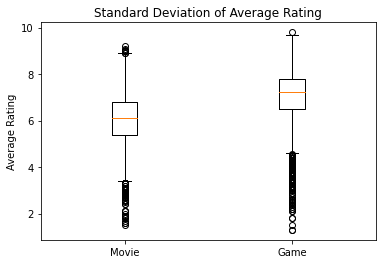

In [29]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['rating_average'], df[df['type'] == "game"]['rating_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Average Rating')
ax.set_title('Standard Deviation of Average Rating')
plt.show()

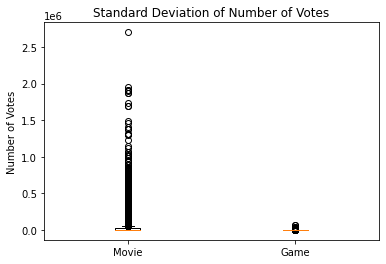

In [30]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['votes_average'], df[df['type'] == "game"]['votes_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Number of Votes')
ax.set_title('Standard Deviation of Number of Votes')
plt.show()

In [31]:
df[df['type'] == "game"]['votes_average'].describe()

count     7305.000000
mean       611.166027
std       2358.429140
min          5.000000
25%         27.000000
50%         80.000000
75%        320.000000
max      69750.000000
Name: votes_average, dtype: float64

In [32]:
df[df['type'] == "movie"]['votes_average'].describe()

count    3.682000e+03
mean     6.539481e+04
std      1.898543e+05
min      5.000000e+00
25%      3.180833e+02
50%      2.022500e+03
75%      2.246400e+04
max      2.700528e+06
Name: votes_average, dtype: float64

We can look at the number of releases each franchise has

In [33]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df['franchise_count_bin'] = pd.cut(df['franchise_count'], bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10-12", "13-15", "16-20", "20+"])

<AxesSubplot:xlabel='Number of releases', ylabel='Number of franchises'>

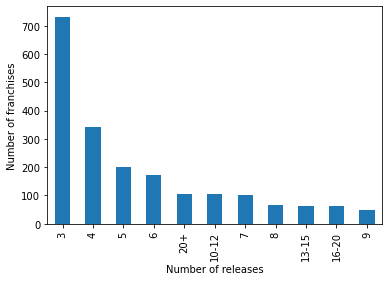

In [34]:
df.groupby('franchise_id')['franchise_count_bin'].first().value_counts().reset_index().plot(
    kind='bar', x='index', y='franchise_count_bin', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

## Note:

This is taking me too long. All I want to do is sort the bins so they go in order but it's taking too long to try to figure out so I'll come back to it

Now I want to see whether the average rating for a franchise as a whole is affected by the number of elements in the franchise. I was going to just get an average based on the grouped years, but have realised that this will result in skewed data. Because we have already got an average for the year, we potentially have changed the weighting of certain movies, so if we try to get an average when we have already averaged some of them, it's going to create problems. Therefore I need to instead use the dataframe where the years were not merged.

In [35]:
df_unmerged = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)
df_unmerged.tconst.count()

10987

In [36]:
df_unmerged.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
1429,Carnivores,3025-1693,game,tt9707428,Carnivores,1998,0,NaN,"[' Simulation', ' Action', 'Sport', ' Sports']",9.0,8.0,4.0,1.0,NaN,NaN,NaN,NaN,0.835476,-0.255343


In [37]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(average_vote_franchise=('votes_average', 'mean'), average_rating_franchise=('rating_average', 'mean')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right')

In [38]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


In [39]:
df_unmerged["Vote_relative_to_franchise_average"] = df_unmerged.apply(lambda row: (row["votes_average"] / row["average_vote_franchise"]) * 100, axis=1)

In [40]:
df_unmerged[df_unmerged["Vote_relative_to_franchise_average"] > 3000]

,franchise_id,min_year,max_year,average_vote_franchise,average_rating_franchise,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise,Vote_relative_to_franchise_average


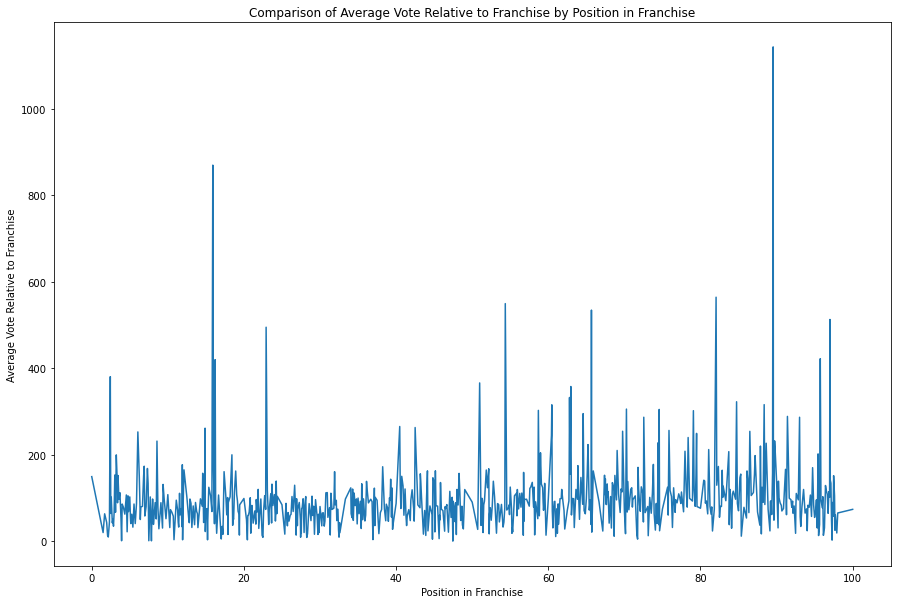

In [41]:
df_unmerged.groupby('position_in_franchise')['Vote_relative_to_franchise_average'].mean().plot(kind='line', figsize=(15,10))
plt.xlabel('Position in Franchise')
plt.ylabel('Average Vote Relative to Franchise')
plt.title('Comparison of Average Vote Relative to Franchise by Position in Franchise')
plt.show()

<AxesSubplot:xlabel='position_in_franchise', ylabel='Vote_relative_to_franchise_average'>

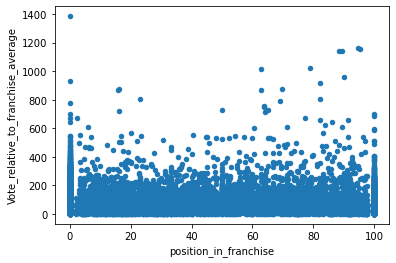

In [123]:
df_unmerged.plot.scatter("position_in_franchise", "Vote_relative_to_franchise_average")

## NEW DATAFRAME
Create a new dataframe with 1 entry per franchise. 

In [ ]:
ne

In [128]:
new_df = df_unmerged.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating_average': 'mean',
    'votes_average': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last'],
    'year_diff': lambda x: np.nanmax(x) - np.nanmin(x)
})

C:\Users\35387\AppData\Local\Temp\ipykernel_148244\3979120033.py:8: RuntimeWarning: All-NaN axis encountered
  'year_diff': lambda x: np.nanmax(x) - np.nanmin(x)


In [125]:
largest_rating = new_df[new_df["type"] == "game"].sort_values(('votes_average'), ascending=False).iloc[0]
largest_rating

ValueError: cannot join with no overlapping index names

In [130]:
new_df.sample(20)

franchise_name   type rating_average  \
                                            first  first           mean   
franchise_id                                                              
f461                               The Stepfather  movie       5.966667   
f1051                            Lyubit po-russki  movie       4.866667   
3025-2473                       The Sands of Time   game       7.825000   
f556          Dr. Mabuse (Post-Fritz Lang series)  movie       5.200000   
f410                                 Men in Black  movie       6.475000   
f265                      Alvin and the Chipmunks  movie       4.725000   
f1292                          Wallace and Gromit  movie       7.200000   
3025-3589                               Injustice   game       7.500000   
f281                                       Bleach  movie       7.125000   
f157                              Captain Barbell  movie       6.775000   
3025-1352                                 Wii Fit   game       7.166667   
3025-873                             YuYu Hakusho   game       7.062500   
3025-1702                                    NieR   game       8.100000   
3025-196                              Fire Emblem   game       7.610784   
3025-366                           Jak and Daxter   game       7.850000   
3025-579                              Sailor Moon   game       6.983333   
f1321                                    Carry On  movie       5.791667   
f955                         Ha-Chayim Al-Pi Agfa  movie       7.100000   
f585                                 Transformers  movie       6.100000   
3025-105                                 Conflict   game       7.120000   

              votes_average franchise_count  year       year_diff  
                       mean           first first  last  <lambda>  
franchise_id                                                       
f461           19299.000000             3.0  1987  2009      18.0  
f1051            114.333333             3.0  1995  1999       2.0  
3025-2473       3173.875000             5.0  2003  2010       4.0  
f556             461.000000             4.0  1962  1990      25.0  
f410          368734.250000             4.0  1997  2019       5.0  
f265           49585.000000             4.0  2007  2015       2.0  
f1292          65353.333333             3.0  2005  2019       6.0  
3025-3589       2738.000000             4.0  2013  2017       0.0  
f281            3254.250000             4.0  2006  2010       1.0  
f157              38.000000             4.0  1964  2003       8.0  
3025-1352        203.333333             3.0  2007  2013       2.0  
3025-873          23.125000             5.0  1993  2018      13.0  
3025-1702       1209.000000             3.0  2010  2021       3.0  
3025-196         183.431373            20.0  1990  2023       6.0  
3025-366        1052.166667             6.0  2001  2009       2.0  
3025-579          10.833333             4.0  1993  2015      16.0  
f1321           3005.696970            31.0  1958  1992      13.0  
f955             299.000000             3.0  1992  1997       1.0  
f585          354274.500000             6.0  2007  2018       2.0  
3025-105         101.200000             5.0  2002  2008       2.0

In [45]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

new_df = new_df.apply(split_year, axis=1)
new_df = new_df[['franchise_name', 'type', 'rating_average', 'votes_average', 'franchise_count', 'first_year', 'last_year']]


In [46]:
new_df["franchise_length"] = new_df.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

In [47]:
new_df.columns = new_df.columns.get_level_values(0)

In [48]:
new_df["franchise_length"].describe()


count    1989.000000
mean       14.551533
std        10.896346
min         1.000000
25%         6.000000
50%        11.000000
75%        21.000000
max        75.000000
Name: franchise_length, dtype: float64

In [49]:
new_df["frequency_of_release"] = new_df.apply(lambda row: row["franchise_count"] / row["franchise_length"], axis = 1)

In [50]:
new_df[new_df['type']== 'game'].frequency_of_release.describe()

count    1157.000000
mean        0.613475
std         0.506560
min         0.069767
25%         0.300000
50%         0.500000
75%         0.750000
max         5.000000
Name: frequency_of_release, dtype: float64

In [51]:
new_df[new_df['type']== 'movie'].frequency_of_release.describe()

count    832.000000
mean       0.736336
std        0.857758
min        0.040000
25%        0.272727
50%        0.444444
75%        0.857143
max        6.000000
Name: frequency_of_release, dtype: float64

<AxesSubplot:xlabel='frequency_of_release'>

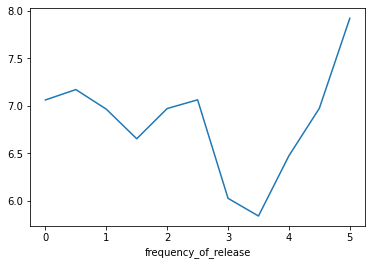

In [52]:
new_df[(new_df['type']== 'game')].groupby(new_df["frequency_of_release"]//0.5*0.5)["rating_average"].mean().plot()


In [53]:
game_df = new_df[new_df['type'] == 'game']
movie_df = new_df[new_df['type'] == 'movie']

In [54]:
min_count = 5
min_movie_df = movie_df[movie_df['franchise_count'] >= min_count]
min_game_df = game_df[game_df['franchise_count'] >= min_count]

# Games Frequency

In [62]:
game_df[game_df["franchise_count"]>10].groupby(game_df['frequency_of_release'] // 0.5 * 0.5)['rating_average'].mean()

frequency_of_release
0.0    6.979349
0.5    7.254262
1.0    7.051365
1.5    6.997852
2.0    7.176136
2.5    6.838890
3.0    7.068750
3.5    5.842395
4.0    6.800734
4.5    6.974436
Name: rating_average, dtype: float64

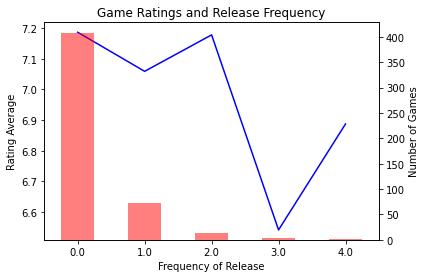

In [63]:
fig, ax1 = plt.subplots()
ax1.plot(game_df[game_df["franchise_count"]>5].groupby(game_df['frequency_of_release'] // 1 * 1)['rating_average'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by frequency of release
ax2 = ax1.twinx()
game_df[game_df["franchise_count"]>5].groupby(game_df['frequency_of_release'] // 1 * 1)['rating_average'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Games')

# set the title
plt.title('Game Ratings and Release Frequency')

# show the plot
plt.show()

In [64]:
game_df['freq_quartile'] = game_df['frequency_of_release'].rank(pct=True)//.25*.25
game_df['freq_quartile'].value_counts()

C:\Users\35387\AppData\Local\Temp\ipykernel_148244\874430505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['freq_quartile'] = game_df['frequency_of_release'].rank(pct=True)//.25*.25


0.50    326
0.00    293
0.75    274
0.25    263
1.00      1
Name: freq_quartile, dtype: int64

C:\Users\35387\AppData\Local\Temp\ipykernel_148244\1538158856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


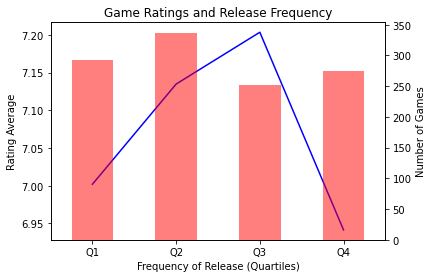

In [65]:
game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby('freq_quartile')['rating_average'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release (Quartiles)')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by quartiles of frequency of release
ax2 = ax1.twinx()
game_df.groupby('freq_quartile')['rating_average'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Games')

# set the title
plt.title('Game Ratings and Release Frequency')

# show the plot
plt.show()

In [66]:
game_df.groupby('freq_quartile')['frequency_of_release'].mean()

freq_quartile
Q1    0.213403
Q2    0.413267
Q3    0.647947
Q4    1.253493
Name: frequency_of_release, dtype: float64

In [67]:
# Q4 - Mario (4.33)
# Q3 - 
# Q2 - Destroy All Humans (0.5)
# Q1 - 

In [140]:
game_df.sort_values("freq_quartile").head(50)

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile
franchise_id,,,,,,,,,,
3025-322,Streets of Rage,game,7.740000,664.600000,5.0,1991,2020,30,0.166667,Q1
3025-2913,Thor,game,6.533333,369.666667,3.0,1993,2013,21,0.142857,Q1
3025-2863,Luigi,game,7.116667,580.500000,8.0,1992,2019,28,0.285714,Q1
3025-280,Thief,game,8.150000,772.500000,4.0,1998,2014,17,0.235294,Q1
3025-28,Alone in the Dark,game,5.841667,249.500000,7.0,1992,2015,24,0.291667,Q1
3025-2789,NCAA Basketball,game,6.960000,14.000000,5.0,1992,2009,18,0.277778,Q1
3025-278,Thunder,game,7.466667,39.333333,3.0,1999,2010,12,0.250000,Q1
3025-2748,Theatrhythm,game,7.333333,19.000000,3.0,2012,2023,12,0.250000,Q1
3025-2745,Speedball,game,6.333333,35.666667,3.0,1987,2000,14,0.214286,Q1


In [69]:
game_df[game_df["freq_quartile"]== "Q1"].head(50)

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile
franchise_id,,,,,,,,,,
3025-1009,NBA Jam,game,7.100000,144.600000,5.0,1993,2010,18,0.277778,Q1
3025-1013,Shadow Warrior,game,6.260000,249.600000,5.0,1994,2022,29,0.172414,Q1
3025-1017,Killer Instinct,game,7.025000,331.000000,4.0,1994,2013,20,0.200000,Q1
3025-1023,Fist of the North Star,game,6.500000,35.500000,9.0,1986,2018,33,0.272727,Q1
3025-1024,Flashback,game,7.133333,116.666667,3.0,1992,2013,22,0.136364,Q1
3025-103,Conan,game,6.180000,151.000000,5.0,1991,2017,27,0.185185,Q1
3025-1030,Rocket Knight Adventures,game,7.133333,27.666667,3.0,1993,2010,18,0.166667,Q1
3025-1034,Mega Man ZX,game,7.433333,40.666667,3.0,2006,2020,15,0.200000,Q1
3025-1046,Peanuts,game,6.666667,32.000000,3.0,1982,2015,34,0.088235,Q1


# Movies Frequency

In [81]:
movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4)#, labels=['Q1', 'Q2', 'Q3', 'Q4'])

C:\Users\35387\AppData\Local\Temp\ipykernel_148244\2684956168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=5)#, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [307]:
movie_df['years_between_movies'] = 1 / movie_df['frequency_of_release']
game_df['years_between_games'] = 1 / game_df['frequency_of_release']

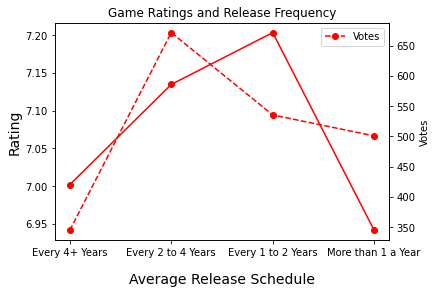

In [179]:
game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['Every 4+ Years', 'Every 2 to 4 Years', 'Every 1 to 2 Years', 'More than 1 a Year'])

fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby('freq_quartile')['rating_average'].mean(), color='red', marker = 'o')
ax1.set_xlabel('Average Release Schedule', fontsize=14)
ax1.set_ylabel('Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(game_df.groupby('freq_quartile')['votes_average'].mean(), color='red', marker = 'o', linestyle='--')
ax2.set_ylabel('Votes')

# set the title
plt.title('Game Ratings and Release Frequency')#
ax1.xaxis.set_label_coords(0.5, -0.15)
plt.legend(labels = ["Votes", "Rating"])
# show the plot
plt.show()

In [302]:
movie_df.sample()

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile,years_between_movies
franchise_id,,,,,,,,,,,
f462,Sailor Moon,movie,7.433333,2064.333333,3.0,1993,2021,29,0.103448,4+ Years,9.666667


In [309]:
game_df.years_between_games.describe()

count    1157.000000
mean        2.593084
std         1.896521
min         0.200000
25%         1.333333
50%         2.000000
75%         3.333333
max        14.333333
Name: years_between_games, dtype: float64

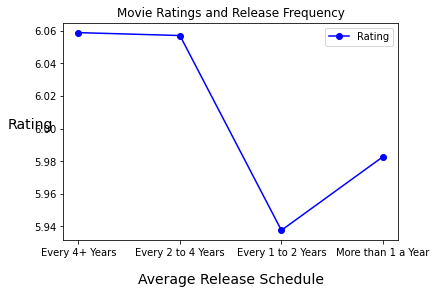

In [304]:
movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4, labels=['Every 4+ Years', 'Every 2 to 4 Years', 'Every 1 to 2 Years', 'More than 1 a Year'])

fig, ax1 = plt.subplots()
ax1.plot(movie_df.groupby('freq_quartile')['rating_average'].mean(), color='blue', marker = 'o', label = "Rating")
ax1.set_xlabel('Average Release Schedule', fontsize=14)
ax1.set_ylabel('Rating', rotation = 0, fontsize=14)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax1.legend()
# show the plot
plt.show()

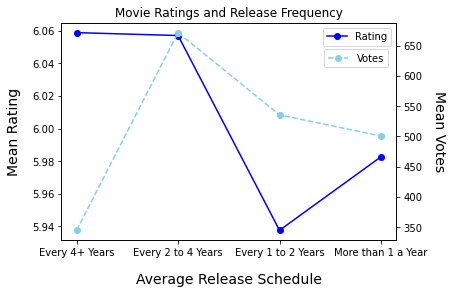

In [230]:
movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4, labels=['Every 4+ Years', 'Every 2 to 4 Years', 'Every 1 to 2 Years', 'More than 1 a Year'])

fig, ax1 = plt.subplots()
ax1.plot(movie_df.groupby('freq_quartile')['rating_average'].mean(), color='blue', marker = 'o', label = "Rating")
ax1.set_xlabel('Average Release Schedule', fontsize=14)
ax1.set_ylabel('Mean Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(game_df.groupby('freq_quartile')['votes_average'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=14, rotation = 270)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax1.legend()
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.9))

# show the plot
plt.show()

In [297]:
plot_title_size = 30
subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15

Text(0.5, 1.05, 'Ratings and Release Frequency')

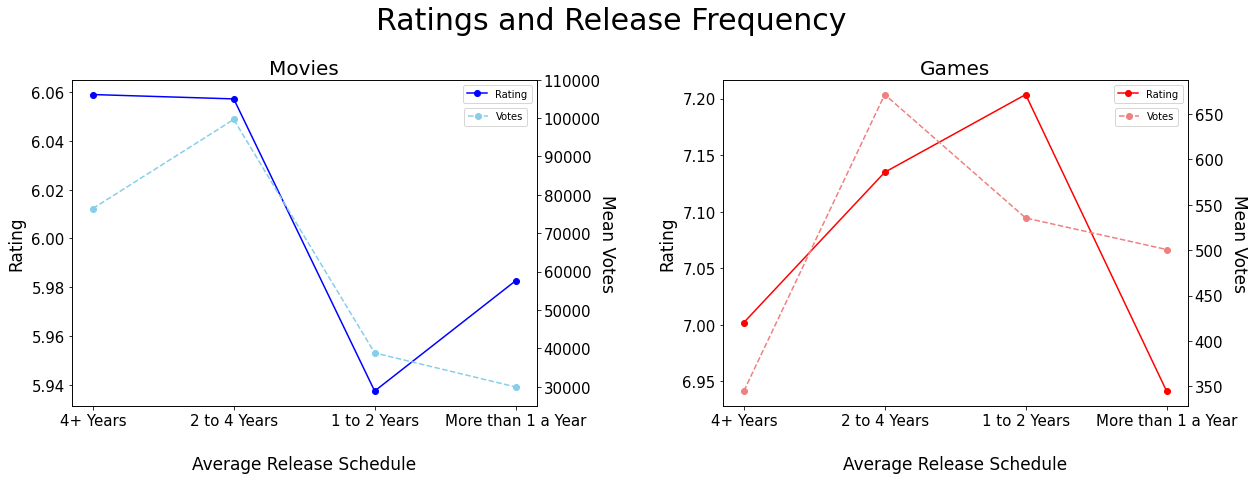

In [301]:
movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4, labels=['4+ Years', '2 to 4 Years', '1 to 2 Years', 'More than 1 a Year'])
game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['4+ Years', '2 to 4 Years', '1 to 2 Years', 'More than 1 a Year'])

fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

axs[0].plot(movie_df.groupby('freq_quartile')['rating_average'].mean(), color='blue', marker = 'o', label = "Rating")
axs[0].set_xlabel('Average Release Schedule', fontsize=ax_label_size)
axs[0].set_ylabel('Rating', fontsize=ax_label_size)

ax2 = axs[0].twinx()
ax2.plot(movie_df.groupby('freq_quartile')['votes_average'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=ax_label_size, rotation = 270)

# set the title
axs[0].set_title('Movies', fontsize = ax_title_size)
axs[0].xaxis.set_label_coords(0.5, -0.1)

axs[1].plot(game_df.groupby('freq_quartile')['rating_average'].mean(), color='red', marker = 'o', label = "Rating")
axs[1].set_xlabel('Average Release Schedule', fontsize=ax_label_size)
axs[1].set_ylabel('Rating', fontsize=ax_label_size)

#adjust ylim on ax2
ax2.set_ylim(25000,110000)

ax3 = axs[1].twinx()
ax3.plot(game_df.groupby('freq_quartile')['votes_average'].mean(), color='lightcoral', marker = 'o', linestyle='--', label = "Votes")
ax3.set_ylabel('Mean Votes', fontsize=ax_label_size, rotation = 270)

axs[1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_size)
ax2.tick_params(axis='y', which='major', labelsize=tick_label_size)
ax3.tick_params(axis='y', which='major', labelsize=tick_label_size)

axs[0].xaxis.set_label_coords(0.5, -0.15)
axs[0].yaxis.set_label_coords(-0.1, 0.5)

ax2.yaxis.set_label_coords(1.17, 0.5)

axs[1].xaxis.set_label_coords(0.5, -0.15)
axs[1].yaxis.set_label_coords(-0.1, 0.5)

ax3.yaxis.set_label_coords(1.13, 0.5)
# set the title
axs[1].set_title('Games', fontsize = ax_title_size)

axs[0].legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.93))

axs[1].legend()
ax3.legend(loc='upper right', bbox_to_anchor=(0.99, 0.93))


plt.subplots_adjust(wspace=0.4)
fig.suptitle('Ratings and Release Frequency', fontsize = plot_title_size, y = 1.05)


In [158]:
game_df.groupby('freq_quartile')['frequency_of_release'].min()

freq_quartile
Every 4+ Years        0.069767
Every 2 to 4 Years    0.307692
Every 1 to 2 Years    0.518519
More than 1 a Year    0.756098
Name: frequency_of_release, dtype: float64

In [157]:
game_df.groupby('freq_quartile')['frequency_of_release'].max()

freq_quartile
Every 4+ Years        0.30
Every 2 to 4 Years    0.50
Every 1 to 2 Years    0.75
More than 1 a Year    5.00
Name: frequency_of_release, dtype: float64

# Regularity

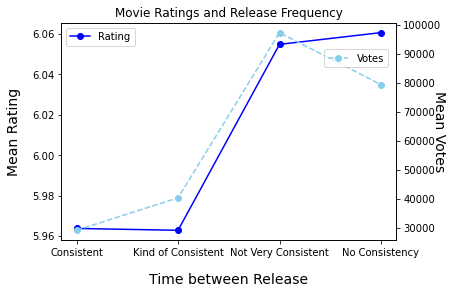

In [316]:
movie_df['reg_quartile'] = pd.qcut(movie_df['years_between_movies'], q=4, labels=['Consistent', 'Kind of Consistent', 'Not Very Consistent', 'No Consistency'])

fig, ax1 = plt.subplots()
ax1.plot(movie_df.groupby('reg_quartile')['rating_average'].mean(), color='blue', marker = 'o', label = "Rating")
ax1.set_xlabel('Time between Release', fontsize=14)
ax1.set_ylabel('Mean Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(movie_df.groupby('reg_quartile')['votes_average'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=14, rotation = 270)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax1.legend()
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.9))

# show the plot
plt.show()

In [317]:
movie_df.sample(50)

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile,years_between_movies,reg_quartile
franchise_id,,,,,,,,,,,,
f190,International Secret Police,movie,6.466667,40.666667,3.0,1963,1965,3,1.000000,More than 1 a Year,1.000000,Consistent
f1293,Puppet Master vs. Dollman vs. Demonic Toys,movie,4.450000,891.250000,4.0,1997,2021,25,0.160000,Every 4+ Years,6.250000,No Consistency
f1069,Mick Travis trilogy,movie,7.066667,11936.666667,3.0,1968,1982,15,0.200000,Every 4+ Years,5.000000,No Consistency
f513,Wild Bill Saunders,movie,6.283333,72.000000,4.0,1939,1940,2,2.000000,More than 1 a Year,0.500000,Consistent
f316,Dick Tracy (serials),movie,6.500000,429.500000,4.0,1937,1941,5,0.800000,Every 1 to 2 Years,1.250000,Kind of Consistent
f1217,Star Wars: Sequel trilogy,movie,7.066667,683615.333333,3.0,2015,2019,5,0.600000,Every 1 to 2 Years,1.666667,Kind of Consistent
f633,The Mummy (Universal film series),movie,6.040000,9053.100000,6.0,1932,1955,24,0.250000,Every 4+ Years,4.000000,No Consistency
f177,Final Destination,movie,5.940000,162422.200000,5.0,2000,2011,12,0.416667,Every 2 to 4 Years,2.400000,Not Very Consistent
f80,Hercules,movie,4.789048,1098.376190,15.0,1958,1964,7,2.142857,More than 1 a Year,0.466667,Consistent


In [313]:
movie_df.groupby('reg_quartile')['years_between_movies'].min()

reg_quartile
Every 4+ Years        0.166667
Every 2 to 4 Years    1.200000
Every 1 to 2 Years    2.285714
More than 1 a Year    3.750000
Name: years_between_movies, dtype: float64

In [314]:
movie_df.groupby('reg_quartile')['years_between_movies'].max()

reg_quartile
Every 4+ Years         1.166667
Every 2 to 4 Years     2.250000
Every 1 to 2 Years     3.666667
More than 1 a Year    25.000000
Name: years_between_movies, dtype: float64

In [104]:
import seaborn as sns

In [105]:
movie_df

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile,years_between_movies
franchise_id,,,,,,,,,,,
f0,The Aldrich Family,movie,6.833333,104.722222,11.0,1939,1944,6,1.833333,Q1,0.545455
f1,Coffin Joe,movie,5.690000,718.900000,10.0,1967,2008,42,0.238095,Q4,4.200000
f100,Dik Trom,movie,5.916667,191.166667,6.0,1941,2010,70,0.085714,Q4,11.666667
f1001,Jesse James (Republic serials),movie,6.666667,132.666667,3.0,1947,1949,3,1.000000,Q1,1.000000
f1002,Jiang tou,movie,6.200000,604.333333,3.0,1975,1981,7,0.428571,Q3,2.333333
...,...,...,...,...,...,...,...,...,...,...,...
f99,The Conjuring Universe,movie,6.264286,205675.000000,8.0,2013,2021,9,0.888889,Q1,1.125000
f990,Inspector Hornleigh,movie,6.725000,258.000000,3.0,1939,1941,3,1.000000,Q1,1.000000
f993,I soliti ignoti,movie,6.766667,4053.333333,3.0,1958,1985,28,0.107143,Q4,9.333333


C:\Users\35387\AppData\Local\Temp\ipykernel_148244\3706531455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['freq_quartile'] = pd.cut(movie_df['years_between_movies'], bins=q, labels=['Q'+str(i) for i in range(1,q+1)])


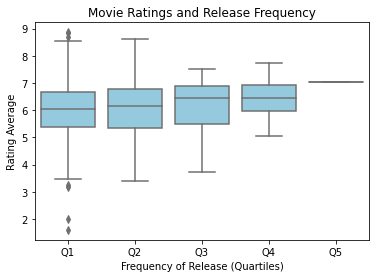

In [116]:
q = 5
movie_df['freq_quartile'] = pd.cut(movie_df['years_between_movies'], bins=q, labels=['Q'+str(i) for i in range(1,q+1)])

fig, ax1 = plt.subplots()
ax1 = sns.boxplot(data = movie_df, x = 'freq_quartile', y = 'rating_average', color = 'skyblue')
ax1.set_xlabel('Frequency of Release (Quartiles)')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by quartiles of frequency of release
#ax2 = ax1.twinx()
#movie_df.groupby('freq_quartile')['rating_average'].count().plot(kind='bar', ax=ax2, alpha=0.2, color='indianred')
#ax2.set_ylabel('Number of Movies')
#
## set the title
plt.title('Movie Ratings and Release Frequency')#

# show the plot
plt.show()

In [117]:
movie_df.groupby('freq_quartile')['years_between_movies'].mean().map(lambda x: np.floor(x)+1)

freq_quartile
Q1     3.0
Q2     7.0
Q3    13.0
Q4    17.0
Q5    26.0
Name: years_between_movies, dtype: float64

In [ ]:
movie_df[movie_df["freq_quartile"]=="Q1"]

In [76]:
movie_df

,franchise_name,type,rating_average,votes_average,franchise_count,first_year,last_year,franchise_length,frequency_of_release,freq_quartile
franchise_id,,,,,,,,,,
f0,The Aldrich Family,movie,6.833333,104.722222,11.0,1939,1944,6,1.833333,Q4
f1,Coffin Joe,movie,5.690000,718.900000,10.0,1967,2008,42,0.238095,Q1
f100,Dik Trom,movie,5.916667,191.166667,6.0,1941,2010,70,0.085714,Q1
f1001,Jesse James (Republic serials),movie,6.666667,132.666667,3.0,1947,1949,3,1.000000,Q4
f1002,Jiang tou,movie,6.200000,604.333333,3.0,1975,1981,7,0.428571,Q2
...,...,...,...,...,...,...,...,...,...,...
f99,The Conjuring Universe,movie,6.264286,205675.000000,8.0,2013,2021,9,0.888889,Q4
f990,Inspector Hornleigh,movie,6.725000,258.000000,3.0,1939,1941,3,1.000000,Q4
f993,I soliti ignoti,movie,6.766667,4053.333333,3.0,1958,1985,28,0.107143,Q1


<AxesSubplot:xlabel='freq_quartile'>

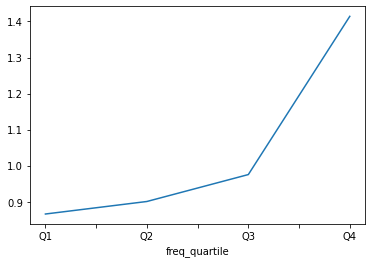

In [71]:
(movie_df.groupby('freq_quartile')['frequency_of_release'].mean()/game_df.groupby('freq_quartile')['frequency_of_release'].mean()).plot()

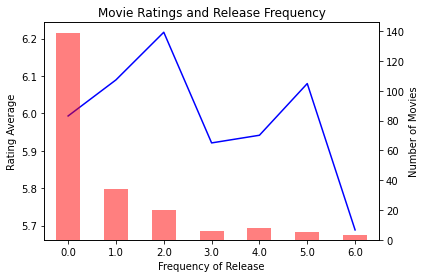

In [72]:
fig, ax1 = plt.subplots()
ax1.plot(movie_df[movie_df["franchise_count"]>5].groupby(movie_df['frequency_of_release'] // 1 * 1)['rating_average'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by frequency of release
ax2 = ax1.twinx()
movie_df[movie_df["franchise_count"]>5].groupby(movie_df['frequency_of_release'] // 1 * 1)['rating_average'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Movies')

# set the title
plt.title('Movie Ratings and Release Frequency')

# show the plot
plt.show()

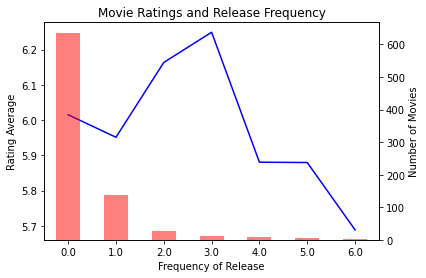

In [73]:
fig, ax1 = plt.subplots()
ax1.plot(new_df[new_df['type'] == 'movie'].groupby(new_df['frequency_of_release'] // 1 * 1)['rating_average'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by frequency of release
ax2 = ax1.twinx()
new_df[new_df['type'] == 'movie'].groupby(new_df['frequency_of_release'] // 1 * 1)['rating_average'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Movies')

# set the title
plt.title('Movie Ratings and Release Frequency')

# show the plot
plt.show()

<AxesSubplot:xlabel='frequency_of_release'>

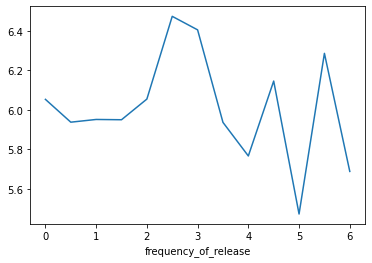

In [74]:
new_df[(new_df['type']== 'movie')].groupby(new_df["frequency_of_release"]//0.5*0.5)["rating_average"].mean().plot()

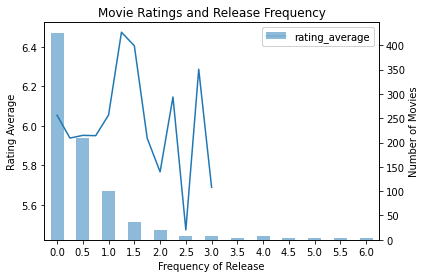

In [75]:
# create a DataFrame with the desired index (frequency of release)
freq_df = pd.DataFrame(index=np.arange(0, 6.5, 0.5))

# create a line plot of the mean ratings by frequency of release
ax1 = freq_df.join(new_df[new_df['type'] == 'movie'].groupby(new_df['frequency_of_release'] // 0.5 * 0.5)['rating_average'].mean()).plot()


# create a bar plot of the count of movies by frequency of release
ax2 = ax1.twinx()
ax2 = freq_df.join(new_df[new_df['type'] == 'movie'].groupby(new_df['frequency_of_release'] // 0.5 * 0.5)['rating_average'].count()).plot(kind='bar', ax=ax2, alpha=0.5)
freq_df
# set the labels and title
ax1.set_xlabel('Frequency of Release')
ax1.set_ylabel('Rating Average')
ax2.set_ylabel('Number of Movies')
plt.title('Movie Ratings and Release Frequency')

# show the plot
plt.show()

In [ ]:
new_df[(new_df['type']== 'movie')].plot.scatter("frequency_of_release", "rating_average")

In [ ]:
new_df[new_df['type']== 'movie'].plot.scatter("first_year", "frequency_of_release")

In [ ]:
new_df[new_df['type']== 'game'].plot.scatter("franchise_count", "average_year_gap_per_release")

In [ ]:
new_df["average_year_gap_per_release"] = new_df.apply(lambda row: row["franchise_length"] / row["franchise_count"], axis = 1)

In [ ]:
new_df["average_year_gap_per_release"].describe()

In [ ]:
new_df

In [ ]:
df

Now I have this, I can get the average rating and number of votes for each franchise, based on the number of elements in that franchise.

In [ ]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['franchise_count_bin'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11-12", "13-15", "16-20", "21+"])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df['franchise_count'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Franchise count")
ax.set_xscale("log")

In [ ]:
new_df['franchise_count_bin'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Number of franchises")

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Game Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Game franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

In [ ]:
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], rot = 90, figsize=(10,10))

In [ ]:
df.sample()

In [ ]:
# Merge the mean ratings back into the original DataFrame
df_unmerged = pd.merge(df_unmerged, df_unmerged.groupby("franchise_id")["rating"].mean().reset_index(), on="franchise_id", suffixes=("", "_franchise_overall"))

# Rename the new column to "franchise_overall_rating"
#df_unmerged = df_unmerged.rename(columns={"rating_mean": "franchise_overall_rating"})


#df_unmerged["franchise_overall_rating"] = df_unmerged.groupby("franchise_id")["rating"].mean()

In [ ]:
df_unmerged.groupby('franchise_id')['rating_franchise_overall'].first().value_counts().sort_index()

In [ ]:
df.sample()

In [ ]:
#bins =[1, 2.01, 3.01, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df_unmerged['overall_franchise_rating_bins'] = pd.cut(df_unmerged['rating_franchise_overall'], bins=10)

In [ ]:
df_unmerged.groupby('franchise_id')['overall_franchise_rating_bins'].first().value_counts().sort_index().plot(
    kind='bar', x='index', y='rating_franchise_overall', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

In [ ]:
df.sort_values("votes_average")

In [ ]:
df["z_votes"].describe()

In [ ]:
df.z_votes.hist()

In [ ]:
sns.lineplot(x = df["z_votes"])
plt.ylim(-4, 4)

In [ ]:
df.z_votes.hist()

In [ ]:
df[df["type"]=="game"].franchise_id.nunique()

In [ ]:
df[df["type"]=="game"].franchise_count_bins.value_counts()

In [ ]:
df[df["type"]=="game"].boxplot(by = "franchise_count_bins", column = ["rating_average"], rot = 90, figsize=(10,10))

In [ ]:
df.plot.bar(x = df.rating_average)

In [ ]:
df.loc[df["type"] == "movie", 'z_rating'] = stats.zscore(df.loc[df["type"] == "movie", 'rating_average'])
df.loc[df["type"] == "game", 'z_rating'] = stats.zscore(df.loc[df["type"] == "game", 'rating_average'])
df.loc[df["type"] == "movie", 'z_votes'] = stats.zscore(df.loc[df["type"] == "movie", 'votes_average'])
df.loc[df["type"] == "game", 'z_votes'] = stats.zscore(df.loc[df["type"] == "game", 'votes_average'])

In [ ]:
df

Getting an overall picture of our data:

In [ ]:
df[df["type"] == "game"].votes_average.describe()

In [ ]:
df[df["type"] == "movie"].votes_average.describe()

In [ ]:
df.rating_average.describe()

In [ ]:
#df.groupby("type").year_diff.boxplot(rot = 90)
#df.groupby("type")[["year_diff"]].boxplot(rot=90)
df.groupby("type").plot(kind="box", rot=90)


In [ ]:
The average re

In [ ]:
df[df["type"]== "movie"]